> **Импортируем начальные данные и удаляем ненужное**



In [ ]:
import pandas as pd

data = pd.read_csv('for_clustering.csv')
df = data.drop('Unnamed: 0', axis = 1)
initial_labels = df['label']
df = df.drop('label', axis = 1)


>**Почему я выбрал алгоритм k-means**

*   Из начальных данных мы знаем необходимое количество кластеров
*   Алгоритм k-means работает быстрее, чем его иерархические коллеги


На самом деле, я дополнительно пробовал использовать другие алгоритмы, такие как spectral clustering и agglomerative clustering, но в конечном счете получал такие же результаты в рамках точности кластеризации, как и в случае с k-means

С алгоритмом k-means также проводились некоторые преобразования, к примеру, смещение центроид, но результат менялся не сильно


Подробнее о полученной точности будет написано ниже






> **Импортируем алгоритм и применяем его к нашим данным, учитывая нужное количество кластеров, в результате получаем кластеризацию**



In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(init = 'k-means++', n_clusters = 2)
k_means.fit(df)
labels = k_means.labels_
df['cluster'] = labels
cluster_1 = df[df['cluster'] == 0]
cluster_2 = df[df['cluster'] == 1]
df['cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       0
1       1
2       1
3       1
4       0
       ..
1495    1
1496    0
1497    0
1498    0
1499    1
Name: cluster, Length: 1500, dtype: int32



> **Теперь изобразим полученные результаты на графике**


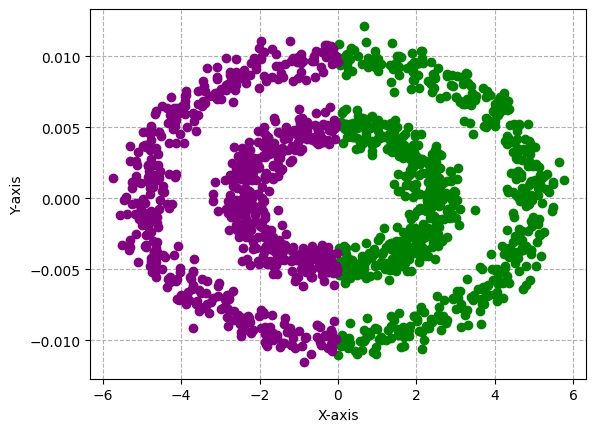

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True, linestyle='--')
plt.plot(cluster_1['X'], cluster_1['Y'], 'o', color = 'green')
plt.plot(cluster_2['X'], cluster_2['Y'], 'o', color = 'purple')



> **Корректность полученных результатов**


Посмотрим на то, как сильно отличаются полученные результаты от тех, которые присутствовали в исходной таблице


Для этого построим график, используя начальные label-ы, и расчитаем точность кластеризации




Результат: 749 из of 1500 образцов данных были кластеризованы правильно
Корректность: 0.50


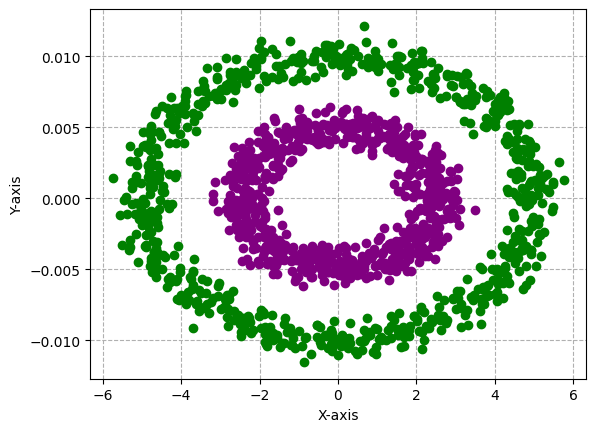

In [ ]:
initial_cluster_1 = data[data['label'] == 0]
initial_cluster_2 = data[data['label'] == 1]
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True, linestyle='--')
plt.plot(initial_cluster_1['X'], initial_cluster_1['Y'], 'o', color = 'green')
plt.plot(initial_cluster_2['X'], initial_cluster_2['Y'], 'o', color = 'purple')


correct = sum(initial_labels == labels)
print("Результат: %d из of %d образцов данных были кластеризованы правильно" % (correct, initial_labels.size))
print('Корректность: {0:0.2f}'. format(correct/float(initial_labels.size)))